In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import NullFormatter  , ScalarFormatter
import matplotlib.axes as ax
import numpy as np
import statistics as st

In [10]:
MODE = 'W'
E = '2'
E_e = '2.2'
EXP = '22'

threads = 2 #In realtà è come se fossero le instances!
num_client_machines = 1
connections_per_thread = [1, 8, 16, 22, 28, 32, 40, 50, 60, 100]
clients = []

for c in connections_per_thread:
    clients.append(c*threads*num_client_machines)
clients

path_c1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Client1/'


WOthroughput_c1_I1 = {1:[], 2:[], 3:[]}
WOthroughput_c1_I2 = {1:[], 2:[], 3:[]}

WOlatencies_c1_I1 = {1:[], 2:[], 3:[]}
WOlatencies_c1_I2 = {1:[], 2:[], 3:[]}


WOideal_throughput_c1_I1 = {1:[], 2:[], 3:[]}
WOideal_throughput_c1_I2 = {1:[], 2:[], 3:[]}

WOideal_latencies_c1_I1 = {1:[], 2:[], 3:[]}
WOideal_latencies_c1_I2 = {1:[], 2:[], 3:[]}


## This puts in the map every measure for different number of connection_per_thread and every try.
for c in connections_per_thread:
    for n_try in [1, 2, 3]:
        filename_Instance1 = str(path_c1)+'E'+str(EXP)+str(MODE)+'OC1I1_C'+str(c)+'_try'+str(n_try)+'.log'
        filename_Instance2 = str(path_c1)+'E'+str(EXP)+str(MODE)+'OC1I2_C'+str(c)+'_try'+str(n_try)+'.log'
       
        filename_Instance1 = open(filename_Instance1, "r")
        filename_Instance2 = open(filename_Instance2, "r")

        for line in filename_Instance1:
            if(len(line.split())!=0):
                if(line.split()[0]=='Sets'):
                    #print(line)
                    WOthroughput_c1_I1.get(n_try).append(float(line.split()[1]))
                    WOlatencies_c1_I1.get(n_try).append(float(line.split()[4]))
                    WOideal_throughput_c1_I1.get(n_try).append(float( (c)/( float(line.split()[4])/1000)))
                    WOideal_latencies_c1_I1.get(n_try).append(float( (c)/( float(line.split()[1])/1000)))
                    
        for line in filename_Instance2:
            if(len(line.split())!=0):
                if(line.split()[0]=='Sets'):
                    #print(line)
                    WOthroughput_c1_I2.get(n_try).append(float(line.split()[1]))
                    WOlatencies_c1_I2.get(n_try).append(float(line.split()[4]))
                    WOideal_throughput_c1_I2.get(n_try).append(float( (c)/( float(line.split()[4])/1000)))
                    WOideal_latencies_c1_I2.get(n_try).append(float( (c)/( float(line.split()[1])/1000)))

                    
                    
num_elem = len(WOthroughput_c1_I2.get(1))

In [11]:
## Summing the throughputs

WOallInstances_c1_throughput = {1:[], 2:[], 3:[]}
WOallInstances_c1_IDEAL_throughput = {1:[], 2:[], 3:[]}

for i in range(0,num_elem,1):
    WOallInstances_c1_throughput.get(1).append(WOthroughput_c1_I1.get(1)[i]+WOthroughput_c1_I2.get(1)[i])
    WOallInstances_c1_throughput.get(2).append(WOthroughput_c1_I1.get(2)[i]+WOthroughput_c1_I2.get(2)[i])
    WOallInstances_c1_throughput.get(3).append(WOthroughput_c1_I1.get(3)[i]+WOthroughput_c1_I2.get(3)[i])

    WOallInstances_c1_IDEAL_throughput.get(1).append(WOideal_throughput_c1_I1.get(1)[i]+WOideal_throughput_c1_I2.get(1)[i])
    WOallInstances_c1_IDEAL_throughput.get(2).append(WOideal_throughput_c1_I1.get(2)[i]+WOideal_throughput_c1_I2.get(2)[i])
    WOallInstances_c1_IDEAL_throughput.get(3).append(WOideal_throughput_c1_I1.get(3)[i]+WOideal_throughput_c1_I2.get(3)[i])


In [12]:

    
#Calculating the average over the different tries.
WOallInstances_c1_throughput_means = np.zeros(num_elem)
WOallInstances_c1_throughput_std = np.zeros(num_elem)
WOallInstances_c1_IDEAL_throughput_means = np.zeros(num_elem)
WOallInstances_c1_IDEAL_throughput_std = np.zeros(num_elem)

for i in range(0,num_elem,1):
    WOallInstances_c1_throughput_means[i] = np.mean(np.array([    WOallInstances_c1_throughput.get(1)[i],
                                                            WOallInstances_c1_throughput.get(2)[i],
                                                            WOallInstances_c1_throughput.get(3)[i]
                                                       ] ))
    WOallInstances_c1_throughput_std[i] = np.std(np.array([    WOallInstances_c1_throughput.get(1)[i],
                                                            WOallInstances_c1_throughput.get(2)[i],
                                                            WOallInstances_c1_throughput.get(3)[i]
                                                       ] ))
    
    WOallInstances_c1_IDEAL_throughput_means[i] = np.mean(np.array([    WOallInstances_c1_IDEAL_throughput.get(1)[i],
                                                                        WOallInstances_c1_IDEAL_throughput.get(2)[i],
                                                                        WOallInstances_c1_IDEAL_throughput.get(3)[i]
                                                       ] ))
    WOallInstances_c1_IDEAL_throughput_std[i] = np.std(np.array([   WOallInstances_c1_IDEAL_throughput.get(1)[i],
                                                                    WOallInstances_c1_IDEAL_throughput.get(2)[i],
                                                                    WOallInstances_c1_IDEAL_throughput.get(3)[i]
                                                       ] ))



In [13]:
WO_allInstances_WEIGHTED_latencies = {1:[], 2:[], 3:[]}
WO_allInstances_WEIGHTED_IDEAL_latencies = {1:[], 2:[], 3:[]}

WO_allInstances_WEIGHTED_latencies_mean = np.zeros(num_elem)
WO_allInstances_WEIGHTED_latencies_std = np.zeros(num_elem)

WO_allInstances_WEIGHTED_IDEAL_latencies_mean = np.zeros(num_elem)
WO_allInstances_WEIGHTED_IDEAL_latencies_std = np.zeros(num_elem)

for i in range(0,num_elem,1):
    for n_try in [1, 2, 3]:
        w1 = (WOthroughput_c1_I1.get(n_try)[i]/(WOthroughput_c1_I1.get(n_try)[i]+WOthroughput_c1_I2.get(n_try)[i]))
        w2 = (WOthroughput_c1_I2.get(n_try)[i]/(WOthroughput_c1_I1.get(n_try)[i]+WOthroughput_c1_I2.get(n_try)[i]))
        
        WO_allInstances_WEIGHTED_latencies.get(n_try).append( 
            (WOlatencies_c1_I1.get(n_try)[i]*w1)
             +                                   
           (WOlatencies_c1_I2.get(n_try)[i]*w2)
           )
        
        w1 = (WOideal_throughput_c1_I1.get(n_try)[i]/(WOideal_throughput_c1_I1.get(n_try)[i]+WOideal_throughput_c1_I2.get(n_try)[i]))
        w2 = (WOideal_throughput_c1_I1.get(n_try)[i]/(WOideal_throughput_c1_I1.get(n_try)[i]+WOideal_throughput_c1_I2.get(n_try)[i]))
        
        WO_allInstances_WEIGHTED_IDEAL_latencies.get(n_try).append( 
            (WOideal_latencies_c1_I1.get(n_try)[i]*w1) +                                   
            
            (WOideal_latencies_c1_I2.get(n_try)[i]*w2 )                           
                                                )
        
    
        
for i in range(0,num_elem,1):
    w1 = (WOallInstances_c1_throughput.get(1)[i])/(WOallInstances_c1_throughput.get(1)[i] + WOallInstances_c1_throughput.get(2)[i] + WOallInstances_c1_throughput.get(3)[i])
    w2 =(WOallInstances_c1_throughput.get(2)[i])/(WOallInstances_c1_throughput.get(1)[i] + WOallInstances_c1_throughput.get(2)[i] + WOallInstances_c1_throughput.get(3)[i])
    w3 =(WOallInstances_c1_throughput.get(3)[i])/(WOallInstances_c1_throughput.get(1)[i] + WOallInstances_c1_throughput.get(2)[i] + WOallInstances_c1_throughput.get(3)[i])

    weights = [w1, w2, w3]
    WO_allInstances_WEIGHTED_latencies_mean[i] = ( ((WO_allInstances_WEIGHTED_latencies.get(1)[i])*w1)
                                           
                                           +((WO_allInstances_WEIGHTED_latencies.get(2)[i])*w2)
                                           
                                           +((WO_allInstances_WEIGHTED_latencies.get(3)[i])*w3)
                                          )
    tmp = [WO_allInstances_WEIGHTED_latencies.get(1)[i], WO_allInstances_WEIGHTED_latencies.get(2)[i], WO_allInstances_WEIGHTED_latencies.get(3)[i] ]
    WO_allInstances_WEIGHTED_latencies_std[i] = np.average((tmp-WO_allInstances_WEIGHTED_latencies_mean[i])**2, weights=weights)

        
        
    w1 = (WOallInstances_c1_IDEAL_throughput.get(1)[i])/(WOallInstances_c1_IDEAL_throughput.get(1)[i] + WOallInstances_c1_IDEAL_throughput.get(2)[i] + WOallInstances_c1_throughput.get(3)[i])
    w2 =(WOallInstances_c1_IDEAL_throughput.get(2)[i])/(WOallInstances_c1_IDEAL_throughput.get(1)[i] + WOallInstances_c1_IDEAL_throughput.get(2)[i] + WOallInstances_c1_throughput.get(3)[i])
    w3 =(WOallInstances_c1_IDEAL_throughput.get(3)[i])/(WOallInstances_c1_IDEAL_throughput.get(1)[i] + WOallInstances_c1_IDEAL_throughput.get(2)[i] + WOallInstances_c1_throughput.get(3)[i])

    weights = [w1, w2, w3]
       
    WO_allInstances_WEIGHTED_IDEAL_latencies_mean[i] = ( ((WO_allInstances_WEIGHTED_IDEAL_latencies.get(1)[i])*w1)
                                           
                                           +((WO_allInstances_WEIGHTED_IDEAL_latencies.get(2)[i])*w2)
                                           
                                           +((WO_allInstances_WEIGHTED_IDEAL_latencies.get(3)[i])*w3)
                                          )
    
    tmp = [WO_allInstances_WEIGHTED_IDEAL_latencies.get(1)[i], WO_allInstances_WEIGHTED_IDEAL_latencies.get(2)[i], WO_allInstances_WEIGHTED_IDEAL_latencies.get(3)[i] ]
    WO_allInstances_WEIGHTED_IDEAL_latencies_std[i] = np.average((tmp-WO_allInstances_WEIGHTED_IDEAL_latencies_mean[i])**2, weights=weights)
    
    

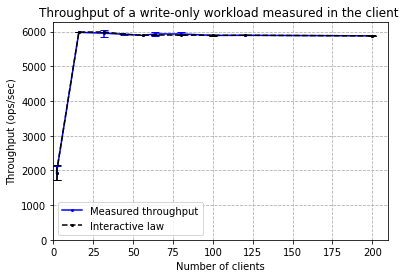

In [14]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Throughput of a write-only workload measured in the client ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, WOallInstances_c1_throughput_means, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients, WOallInstances_c1_IDEAL_throughput_means, color='black', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )

ax_lst.errorbar(clients,WOallInstances_c1_throughput_means, yerr=WOallInstances_c1_throughput_std, fmt=None, ecolor='b', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOallInstances_c1_IDEAL_throughput_means, yerr=WOallInstances_c1_IDEAL_throughput_std, fmt=None, ecolor='black', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([ line_c1, line_c2 ], ['Measured throughput','Interactive law'])
plt.savefig("../ThroughputE22WOallInstances.png", bbox_inches='tight')

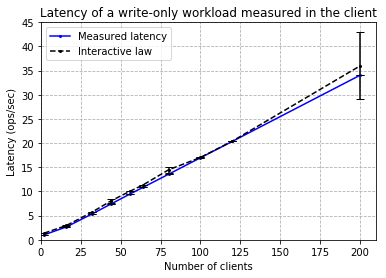

In [15]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Latency (ops/sec)')
plt.title("Latency of a write-only workload measured in the client")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, WO_allInstances_WEIGHTED_latencies_mean, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients, WO_allInstances_WEIGHTED_IDEAL_latencies_mean, color='black', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )

ax_lst.errorbar(clients,WO_allInstances_WEIGHTED_latencies_mean, yerr=WO_allInstances_WEIGHTED_latencies_std, fmt=None, ecolor='black', capthick=1, capsize=4)
ax_lst.errorbar(clients,WO_allInstances_WEIGHTED_IDEAL_latencies_mean, yerr=WO_allInstances_WEIGHTED_IDEAL_latencies_std, fmt=None, ecolor='black', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([ line_c1, line_c2 ], ['Measured latency','Interactive law'])
plt.savefig("../LatencyE22WOallInstances.png", bbox_inches='tight')

In [16]:
import csv
with open('../Write_Only_DataExp22.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow( WOallInstances_c1_throughput_means)
    writer.writerow(WOallInstances_c1_throughput_std)
    
    writer.writerow(WOallInstances_c1_IDEAL_throughput_means)
    writer.writerow(WOallInstances_c1_IDEAL_throughput_std)

    writer.writerow( WO_allInstances_WEIGHTED_latencies_mean)
    writer.writerow(WO_allInstances_WEIGHTED_latencies_std)
    
    writer.writerow(WO_allInstances_WEIGHTED_IDEAL_latencies_mean)
    writer.writerow(WO_allInstances_WEIGHTED_IDEAL_latencies_std)

### For READ ONLY

In [17]:
MODE = 'R'
E = '2'
E_e = '2.2'
EXP = '22'

threads = 2
num_client_machines = 1
connections_per_thread = [1, 8, 16, 22, 28, 32, 40, 50, 60, 100]
clients = []

for c in connections_per_thread:
    clients.append(c*threads*num_client_machines)
clients

path_c1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Client1/'


ROthroughput_c1_I1 = {1:[], 2:[], 3:[]}
ROthroughput_c1_I2 = {1:[], 2:[], 3:[]}

ROlatencies_c1_I1 = {1:[], 2:[], 3:[]}
ROlatencies_c1_I2 = {1:[], 2:[], 3:[]}

ROideal_throughput_c1_I1 = {1:[], 2:[], 3:[]}
ROideal_throughput_c1_I2 = {1:[], 2:[], 3:[]}

ROideal_latencies_c1_I1 = {1:[], 2:[], 3:[]}
ROideal_latencies_c1_I2 = {1:[], 2:[], 3:[]}


## This puts in the map every measure for different number of connection_per_thread and every try.
for c in connections_per_thread:
    for n_try in [1, 2, 3]:
        filename_c1_I1 = str(path_c1)+'E'+str(EXP)+str(MODE)+'OC1I1_C'+str(c)+'_try'+str(n_try)+'.log'
        filename_c1_I2 = str(path_c1)+'E'+str(EXP)+str(MODE)+'OC1I2_C'+str(c)+'_try'+str(n_try)+'.log'
        
        filename_c1_I1 = open(filename_c1_I1, "r")
        filename_c1_I2 = open(filename_c1_I2, "r")
   
        for line in filename_c1_I1:
            if(len(line.split())!=0):
                if(line.split()[0]=='Gets'):
                    #print(line)
                    ROthroughput_c1_I1.get(n_try).append(float(line.split()[1]))
                    ROlatencies_c1_I1.get(n_try).append(float(line.split()[4]))
                    ROideal_throughput_c1_I1.get(n_try).append(float( (c)/( float(line.split()[4])/1000)))
                    ROideal_latencies_c1_I1.get(n_try).append(float( (c)/( float(line.split()[1])/1000)))
                

                
        for line in filename_c1_I2:
            if(len(line.split())!=0):
                if(line.split()[0]=='Gets'):
                    #print(line)
                    ROthroughput_c1_I2.get(n_try).append(float(line.split()[1]))
                    ROlatencies_c1_I2.get(n_try).append(float(line.split()[4]))
                    ROideal_throughput_c1_I2.get(n_try).append(float( (c)/( float(line.split()[4])/1000)))
                    ROideal_latencies_c1_I2.get(n_try).append(float( (c)/( float(line.split()[1])/1000)))
                
num_elem = num_elem = len(ROthroughput_c1_I2.get(1))


In [18]:
## Summing the throughputs

ROallInstances_c1_throughput = {1:[], 2:[], 3:[]}
ROallInstances_c1_IDEAL_throughput = {1:[], 2:[], 3:[]}

for i in range(0,num_elem,1):
    ROallInstances_c1_throughput.get(1).append(ROthroughput_c1_I1.get(1)[i]+ROthroughput_c1_I2.get(1)[i])
    ROallInstances_c1_throughput.get(2).append(ROthroughput_c1_I1.get(2)[i]+ROthroughput_c1_I2.get(2)[i])
    ROallInstances_c1_throughput.get(3).append(ROthroughput_c1_I1.get(3)[i]+ROthroughput_c1_I2.get(3)[i])

    ROallInstances_c1_IDEAL_throughput.get(1).append(ROideal_throughput_c1_I1.get(1)[i]+ROideal_throughput_c1_I2.get(1)[i])
    ROallInstances_c1_IDEAL_throughput.get(2).append(ROideal_throughput_c1_I1.get(2)[i]+ROideal_throughput_c1_I2.get(2)[i])
    ROallInstances_c1_IDEAL_throughput.get(3).append(ROideal_throughput_c1_I1.get(3)[i]+ROideal_throughput_c1_I2.get(3)[i])

    
#Calculating the average over the different tries.
ROallInstances_c1_throughput_means = np.zeros(num_elem)
ROallInstances_c1_throughput_std = np.zeros(num_elem)
ROallInstances_c1_IDEAL_throughput_means = np.zeros(num_elem)
ROallInstances_c1_IDEAL_throughput_std = np.zeros(num_elem)

for i in range(0,num_elem,1):
    ROallInstances_c1_throughput_means[i] = np.mean(np.array([    ROallInstances_c1_throughput.get(1)[i],
                                                            ROallInstances_c1_throughput.get(2)[i],
                                                            ROallInstances_c1_throughput.get(3)[i]
                                                       ] ))
    ROallInstances_c1_throughput_std[i] = np.std(np.array([    ROallInstances_c1_throughput.get(1)[i],
                                                            ROallInstances_c1_throughput.get(2)[i],
                                                            ROallInstances_c1_throughput.get(3)[i]
                                                       ] ))
    
    ROallInstances_c1_IDEAL_throughput_means[i] = np.mean(np.array([    ROallInstances_c1_IDEAL_throughput.get(1)[i],
                                                                        ROallInstances_c1_IDEAL_throughput.get(2)[i],
                                                                        ROallInstances_c1_IDEAL_throughput.get(3)[i]
                                                       ] ))
    ROallInstances_c1_IDEAL_throughput_std[i] = np.std(np.array([   ROallInstances_c1_IDEAL_throughput.get(1)[i],
                                                                    ROallInstances_c1_IDEAL_throughput.get(2)[i],
                                                                    ROallInstances_c1_IDEAL_throughput.get(3)[i]
                                                       ] ))



In [20]:
RO_allInstances_WEIGHTED_latencies = {1:[], 2:[], 3:[]}
RO_allInstances_WEIGHTED_IDEAL_latencies = {1:[], 2:[], 3:[]}

RO_allInstances_WEIGHTED_latencies_mean = np.zeros(num_elem)
RO_allInstances_WEIGHTED_latencies_std = np.zeros(num_elem)

RO_allInstances_WEIGHTED_IDEAL_latencies_mean = np.zeros(num_elem)
RO_allInstances_WEIGHTED_IDEAL_latencies_std = np.zeros(num_elem)

for i in range(0,num_elem,1):
    for n_try in [1, 2, 3]:
        w1 = (ROthroughput_c1_I1.get(n_try)[i]/(ROthroughput_c1_I1.get(n_try)[i]+ROthroughput_c1_I2.get(n_try)[i]))
        w2 = (ROthroughput_c1_I2.get(n_try)[i]/(ROthroughput_c1_I1.get(n_try)[i]+ROthroughput_c1_I2.get(n_try)[i]))
        
        RO_allInstances_WEIGHTED_latencies.get(n_try).append( 
            (ROlatencies_c1_I1.get(n_try)[i]*w1)
             +                                   
           (ROlatencies_c1_I2.get(n_try)[i]*w2)
           )
        
        w1 = (ROideal_throughput_c1_I1.get(n_try)[i]/(ROideal_throughput_c1_I1.get(n_try)[i]+ROideal_throughput_c1_I2.get(n_try)[i]))
        w2 = (ROideal_throughput_c1_I1.get(n_try)[i]/(ROideal_throughput_c1_I1.get(n_try)[i]+ROideal_throughput_c1_I2.get(n_try)[i]))
        
        RO_allInstances_WEIGHTED_IDEAL_latencies.get(n_try).append( 
            (ROideal_latencies_c1_I1.get(n_try)[i]*w1) +                                   
            
            (ROideal_latencies_c1_I2.get(n_try)[i]*w2 )                           
                                                )
        
        
for i in range(0,num_elem,1):
    w1 = (ROallInstances_c1_throughput.get(1)[i])/(ROallInstances_c1_throughput.get(1)[i] + ROallInstances_c1_throughput.get(2)[i] + ROallInstances_c1_throughput.get(3)[i])
    w2 =(ROallInstances_c1_throughput.get(2)[i])/(ROallInstances_c1_throughput.get(1)[i] + ROallInstances_c1_throughput.get(2)[i] + ROallInstances_c1_throughput.get(3)[i])
    w3 =(ROallInstances_c1_throughput.get(3)[i])/(ROallInstances_c1_throughput.get(1)[i] + ROallInstances_c1_throughput.get(2)[i] + ROallInstances_c1_throughput.get(3)[i])

    weights = [w1, w2, w3]
    RO_allInstances_WEIGHTED_latencies_mean[i] = ( ((RO_allInstances_WEIGHTED_latencies.get(1)[i])*w1)
                                           
                                           +((RO_allInstances_WEIGHTED_latencies.get(2)[i])*w2)
                                           
                                           +((RO_allInstances_WEIGHTED_latencies.get(3)[i])*w3)
                                          )
    tmp = [RO_allInstances_WEIGHTED_latencies.get(1)[i], RO_allInstances_WEIGHTED_latencies.get(2)[i], RO_allInstances_WEIGHTED_latencies.get(3)[i] ]
    RO_allInstances_WEIGHTED_latencies_std[i] = np.average((tmp-RO_allInstances_WEIGHTED_latencies_mean[i])**2, weights=weights)

        
        
    w1 = (ROallInstances_c1_IDEAL_throughput.get(1)[i])/(ROallInstances_c1_IDEAL_throughput.get(1)[i] + ROallInstances_c1_IDEAL_throughput.get(2)[i] + ROallInstances_c1_throughput.get(3)[i])
    w2 =(ROallInstances_c1_IDEAL_throughput.get(2)[i])/(ROallInstances_c1_IDEAL_throughput.get(1)[i] + ROallInstances_c1_IDEAL_throughput.get(2)[i] + ROallInstances_c1_throughput.get(3)[i])
    w3 =(ROallInstances_c1_IDEAL_throughput.get(3)[i])/(ROallInstances_c1_IDEAL_throughput.get(1)[i] + ROallInstances_c1_IDEAL_throughput.get(2)[i] + ROallInstances_c1_throughput.get(3)[i])

    weights = [w1, w2, w3]
       
    RO_allInstances_WEIGHTED_IDEAL_latencies_mean[i] = ( ((RO_allInstances_WEIGHTED_IDEAL_latencies.get(1)[i])*w1)
                                           
                                           +((RO_allInstances_WEIGHTED_IDEAL_latencies.get(2)[i])*w2)
                                           
                                           +((RO_allInstances_WEIGHTED_IDEAL_latencies.get(3)[i])*w3)
                                          )
    
    tmp = [RO_allInstances_WEIGHTED_IDEAL_latencies.get(1)[i], RO_allInstances_WEIGHTED_IDEAL_latencies.get(2)[i], RO_allInstances_WEIGHTED_IDEAL_latencies.get(3)[i] ]
    RO_allInstances_WEIGHTED_IDEAL_latencies_std[i] = np.average((tmp-RO_allInstances_WEIGHTED_IDEAL_latencies_mean[i])**2, weights=weights)
    
    

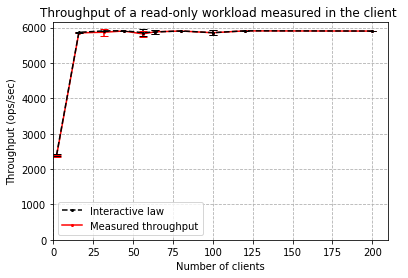

In [21]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Throughput of a read-only workload measured in the client ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, ROallInstances_c1_throughput_means, color='red', linestyle='solid', marker='o',markerfacecolor='red', markersize=2)
line_c2, = plt.plot(clients, ROallInstances_c1_IDEAL_throughput_means, color='black', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )

ax_lst.errorbar(clients, ROallInstances_c1_throughput_means, yerr=ROallInstances_c1_throughput_std, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients, ROallInstances_c1_IDEAL_throughput_means, yerr=ROallInstances_c1_IDEAL_throughput_std, fmt=None, ecolor='black', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([line_c2, line_c1], ['Interactive law', 'Measured throughput'])
plt.savefig("../ThroughputE22ROallInstances.png", bbox_inches='tight')

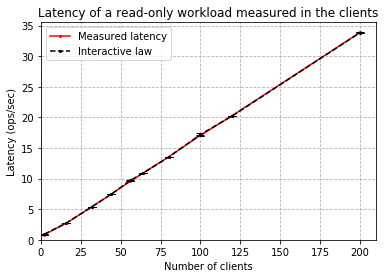

In [22]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Latency (ops/sec)')
plt.title("Latency of a read-only workload measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, RO_allInstances_WEIGHTED_latencies_mean, color='red', linestyle='solid', marker='o',markerfacecolor='red', markersize=2)
line_c2, = plt.plot(clients, RO_allInstances_WEIGHTED_IDEAL_latencies_mean, color='black', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )

ax_lst.errorbar(clients,RO_allInstances_WEIGHTED_latencies_mean, yerr=RO_allInstances_WEIGHTED_latencies_std, fmt=None, ecolor='black', capthick=1, capsize=4)
ax_lst.errorbar(clients,RO_allInstances_WEIGHTED_IDEAL_latencies_mean, yerr=RO_allInstances_WEIGHTED_IDEAL_latencies_std, fmt=None, ecolor='black', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([ line_c1, line_c2 ], ['Measured latency','Interactive law'])
plt.savefig("../LatencyE22ROallInstances.png", bbox_inches='tight')

In [23]:
import csv
with open('../Read_Only_DataExp22.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(ROallInstances_c1_throughput_means)
    writer.writerow(ROallInstances_c1_throughput_std)
    
    writer.writerow(ROallInstances_c1_IDEAL_throughput_means)
    writer.writerow(ROallInstances_c1_IDEAL_throughput_std)
    
    writer.writerow(RO_allInstances_WEIGHTED_latencies_mean)
    writer.writerow(RO_allInstances_WEIGHTED_latencies_std)
    
    writer.writerow(RO_allInstances_WEIGHTED_IDEAL_latencies_mean)
    writer.writerow(RO_allInstances_WEIGHTED_IDEAL_latencies_std)


## Compare Write_Only & Read_Only

#### Comparing Write_Only & Read_Only THROUGHPUT !

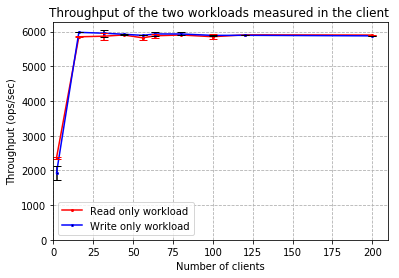

In [24]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
### 
#### ACHTUNG!!!!!!!!!!
#####ATTENZIONE !!!! MANCA LA PARTE IN CUI È OVERLOADED!!!

plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Throughput of the two workloads measured in the client ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, ROallInstances_c1_throughput_means, color='red', linestyle='solid', marker='o',markerfacecolor='red', markersize=2)
line_c2, = plt.plot(clients, WOallInstances_c1_throughput_means, color='blue', linestyle='solid', marker='o', markerfacecolor='black',markersize=2 )

ax_lst.errorbar(clients, ROallInstances_c1_throughput_means, yerr=ROallInstances_c1_throughput_std, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients, WOallInstances_c1_throughput_means, yerr=WOallInstances_c1_throughput_std, fmt=None, ecolor='black', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([line_c1, line_c2], ['Read only workload', 'Write only workload'])
plt.savefig("../Throughput_ReadVSWriteE22.png", bbox_inches='tight')

In [27]:
WOallInstances_c1_throughput_means

array([1926.63666667, 5979.05333333, 5954.09333333, 5924.16666667,
       5892.59333333, 5932.58333333, 5932.7       , 5891.16      ,
       5893.79666667, 5877.65333333])

In [28]:
np.max(WOallInstances_c1_throughput_means)

5979.053333333333

In [26]:
ROallInstances_c1_throughput_means


array([2362.96      , 5851.05333333, 5868.6       , 5903.46      ,
       5821.47666667, 5880.28      , 5902.81666667, 5853.66      ,
       5906.68666667, 5900.94      ])

In [29]:
np.max(ROallInstances_c1_throughput_means)

5906.686666666666

#### Comparing Write_Only & Read_Only LATENCY !

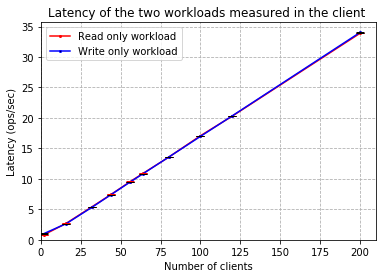

In [25]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
### 
#### ACHTUNG!!!!!!!!!!
#####ATTENZIONE !!!! MANCA LA PARTE IN CUI È OVERLOADED!!!

plt.xlabel('Number of clients')
plt.ylabel('Latency (ops/sec)')
plt.title("Latency of the two workloads measured in the client ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, RO_allInstances_WEIGHTED_latencies_mean, color='red', linestyle='solid', marker='o',markerfacecolor='red', markersize=2)
line_c2, = plt.plot(clients, WO_allInstances_WEIGHTED_latencies_mean, color='blue', linestyle='solid', marker='o', markerfacecolor='black',markersize=2 )

ax_lst.errorbar(clients, RO_allInstances_WEIGHTED_latencies_mean, yerr=RO_allInstances_WEIGHTED_latencies_std, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients, WO_allInstances_WEIGHTED_latencies_mean, yerr=WO_allInstances_WEIGHTED_latencies_std, fmt=None, ecolor='black', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([line_c1, line_c2], ['Read only workload', 'Write only workload'])
plt.savefig("../Latency_ReadVSWriteE22.png", bbox_inches='tight')